In [32]:
import pandas as pd
import numpy as np
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

#<b>Remove this code</b>

In [33]:

# @hidden_cell
credentials_2 = {
  'auth_url':'https://identity.open.softlayer.com',
  'project':'object_storage_d81e0539_4836_4da9_ae62_9665be5a872c',
  'project_id':'eafe92ef21874fcbb43b1a813f667a6a',
  'region':'dallas',
  'user_id':'aa5b64b951294839b1afc0da800631dd',
  'domain_id':'7798bf9ad6564a1583f1f2af8c2a92de',
  'domain_name':'1257745',
  'username':'member_3b205d99c3934ac4fc5b44445d55858302b73bb1',
  'password':"""MD5({70Mx*{3L[^a""",
  'container':'LendingClubDataSet',
  'tenantId':'undefined',
  'filename':'LoanStats3a_securev1.csv'
}

In [34]:


from io import StringIO
import requests
import json
import pandas as pd

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_d81e053948364da9ae629665be5a872c(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_3b205d99c3934ac4fc5b44445d55858302b73bb1','domain': {'id': '7798bf9ad6564a1583f1f2af8c2a92de'},
            'password': 'MD5({70Mx*{3L[^a'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

# skip row 1 so pandas can parse the data properly.

In [35]:

df_data_1 = pd.read_csv(get_object_storage_file_with_credentials_d81e053948364da9ae629665be5a872c('LendingClubDataSet', 'LoanStats3a_securev1.csv'), skiprows=1)
#df_data_1 = pd.read_csv('LoanStats3a_securev1.csv', skiprows=1)
df_data_1.head()


/usr/local/src/conda3_runtime/4.1.1/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,NaN,Mar-2017,754.0,750.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,NaN,Oct-2016,499.0,0.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-2014,649.91,NaN,Mar-201

In [36]:

df_data_3 = pd.read_csv(get_object_storage_file_with_credentials_d81e053948364da9ae629665be5a872c('LendingClubDataSet', 'LoanStats3a_securev1 2.csv'),skiprows=1)
df_data_3.head()


/usr/local/src/conda3_runtime/4.1.1/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,NaN,Mar-2017,754.0,750.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,NaN,Oct-2016,499.0,0.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-2014,649.91,NaN,Mar-201


 # Drop any column with more than 50% missing values

In [37]:

loans_2007 = df_data_1
half_count = len(loans_2007) / 2
loans_2007 = loans_2007.dropna(thresh=half_count,axis=1) # Drop any column with more than 50% missing values
loans_2007 = loans_2007.drop(['url','desc'],axis=1)  # These columns are not useful for our purposes

In [38]:
loans_2007.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.0,0.00,Jan-2015,171.62,Mar-2017,754.0,750.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.0,122.9,1.11,Apr-2013,119.66,Oct-2016,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.0,0.00,Jun-2014,649.91,Mar-2017,684.0,680.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [44]:
loans_2007['last_fico_range'] = loans_2007.last_fico_range_low.astype('str') + '-' + loans_2007.last_fico_range_high.astype('str')
loans_2007['last_meanfico'] = (loans_2007.last_fico_range_low + loans_2007.last_fico_range_high)/2


loans_2007.int_rate = pd.Series(loans_2007.int_rate).str.replace('%', '').astype(float)
loans_2007.fillna(0.0,inplace=True)
loans_2007.fillna(0,inplace=True)

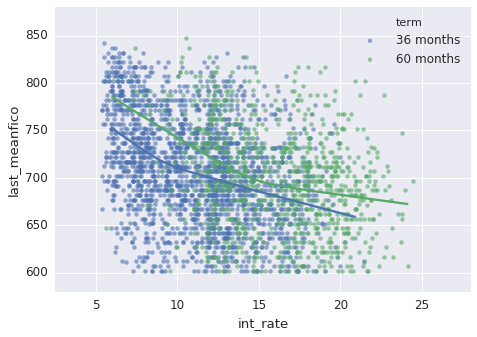

In [45]:
plot_df = loans_2007.query('last_meanfico > 600 & int_rate <28')[:3000]

sns.set(font_scale=1.2, rc={"lines.linewidth": 1.5}) 



g = sns.lmplot("int_rate", "last_meanfico", x_jitter= .7,  y_jitter= .1,
           data=plot_df, hue='term',lowess=True, size=5,aspect=1.4, legend_out=False,
           scatter_kws={ 's':20, 'alpha':.6})

g.set(xlim=(2.5, 28),ylim=(580, 880),alpha = .5)

g.savefig('1.png',transparent=True)


In [293]:
loans_2007.shape


(42538, 56)

 # Adding Data Dictionary Provided by Lending Club Dataset. 
 #converted excel to csv file

In [294]:

df_data_2 = pd.read_csv(get_object_storage_file_with_credentials_d81e053948364da9ae629665be5a872c('LendingClubDataSet', 'LCDataDictionary.csv'))
#df_data_2 = pd.read_csv('LCDataDictionary.csv')
df_data_2.head()


,LoanStatNew,Description,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,zip_code,The first 3 numbers of the zip code provided by the borrower in the loan application.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,addr_state,The state provided by the borrower in the loan application,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,annual_inc,The annual income provided by the borrower during registration.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,collection_recovery_fee,post charge off collection fee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [295]:
data_dictionary = df_data_2 # Loading in the data dictionary
print(data_dictionary.shape[0])
print(data_dictionary.columns.tolist())

58
['LoanStatNew', 'Description', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10']


In [296]:
data_dictionary.head()
data_dictionary = data_dictionary.rename(columns={'LoanStatNew': 'name',
                                                 'Description': 'description'})

In [297]:

data_dictionary=data_dictionary.dropna(axis=1,how='all')
data_dictionary.head()



,name,description
0,zip_code,The first 3 numbers of the zip code provided by the borrower in the loan application.
1,addr_state,The state provided by the borrower in the loan application
2,annual_inc,The annual income provided by the borrower during registration.
3,collection_recovery_fee,post charge off collection fee
4,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections


In [298]:
loans_2007_dtypes = pd.DataFrame(loans_2007.dtypes,columns=['dtypes'])
loans_2007_dtypes = loans_2007_dtypes.reset_index()
loans_2007_dtypes['name'] = loans_2007_dtypes['index']
loans_2007_dtypes = loans_2007_dtypes[['name','dtypes']]

loans_2007_dtypes['first value'] = loans_2007.loc[0].values
analysis = loans_2007_dtypes.merge(data_dictionary, on='name',how='left')

In [301]:
loans_2007['issue_d'].dtype

dtype('O')

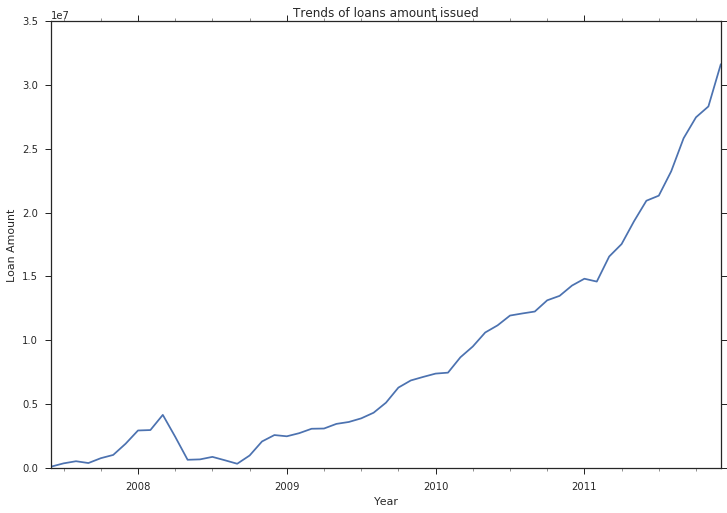

In [302]:
loans_2007['issue_d'] = pd.to_datetime(loans_2007.issue_d)
loans_2007.groupby('issue_d')['loan_amnt'].sum().plot()
plt.title('Trends of loans amount issued')
plt.xlabel('Year')
plt.ylabel('Loan Amount')

                              

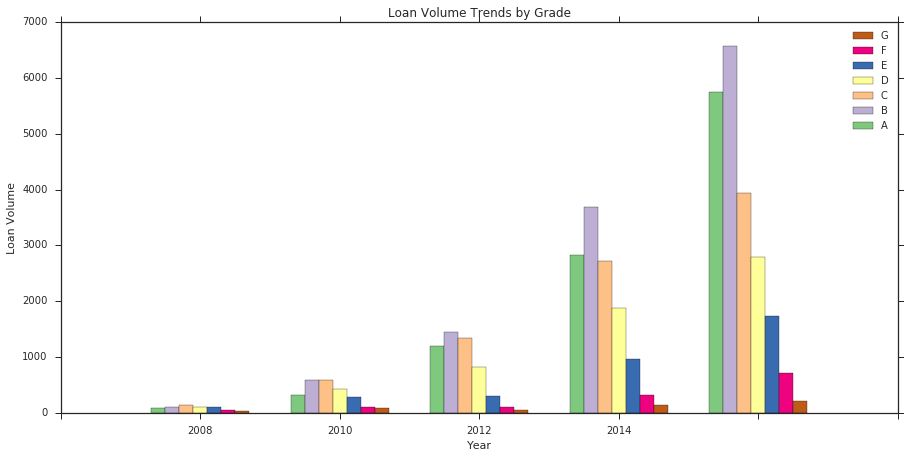

In [303]:
loans_2007['issue_Y'] = loans_2007['issue_d'].dt.year
temp = loans_2007.groupby(['grade','issue_Y'],as_index=False)['id'].count()

import matplotlib.cm as cm
dpoints = np.array(temp)
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1,1,1)
space = 0.3
conditions = np.unique(dpoints[:,0])
categories = np.unique(dpoints[:,1])
n = len(conditions)
width = (1-space)/len(conditions)

for i,cond in enumerate(conditions):
    vals = dpoints[dpoints[:,0] == cond][:,2].astype(np.float)
    pos = [j - (1 - space) / 2. + i * width for j in range(1,len(categories)+1)]
    ax.bar(pos, vals, width = width,label=cond, 
       color=cm.Accent(float(i) / n))
    ax.set_xticklabels(['','2008','2010','2012','2014',''])
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1])
    ax.set_ylabel("Loan Volume")
    ax.set_xlabel("Year")
plt.title('Loan Volume Trends by Grade')






# So new Data frame preview contains 
<table>
<tr>
<h4>name</h4><p>Column Names</p></tr>
<tr>
<h4>dtypes</h4><p>Dtypes of columns</p></tr>
<tr>
<h4>first value</h4><p>first value</p></tr>
<tr>
<h4>description</h4><p>Description of columns</p></tr>
</table>

In [251]:
analysis.head()

,name,dtypes,first value,description
0,id,object,1077501,A unique LC assigned ID for the loan listing.
1,member_id,float64,1.2966e+06,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,5000,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,float64,5000,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,4975,The total amount committed by investors for that loan at that point in time.


In [252]:
analysis[:19]

,name,dtypes,first value,description
0,id,object,1077501,A unique LC assigned ID for the loan listing.
1,member_id,float64,1.2966e+06,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,5000,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,float64,5000,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,4975,The total amount committed by investors for that loan at that point in time.
5,term,object,36 months,The number of payments on the loan. Values are in months and can be either 36 or 60.
6,int_rate,object,10.65%,Interest Rate on the loan
7,installment,float64,162.87,The monthly payment owed by the borrower if the loan originates.
8,grade,object,B,LC assigned loan grade
9,sub_grade,object,B2,LC assigned loan subgrade


# Analysis of first 19 columns 
<p>columns to be removed</p>
<p>id - Randomly genereated Unique Identification Number </p>
<p>member_id - randomly generated field by identification purposes</p>
<p>funded_amnt - Gives future information</p>
<p>funded_amnt_inv - Gives future information</p>
<p>sub_grade - Already defined in grade</p>
<p>int_rate - Already included in grade</p>
<p>emp_title - not much useful unless mapped wiht other information</p>
<p>issued_d - Gives future information</p>

In [253]:
drop_list = ['id','member_id','funded_amnt','funded_amnt_inv',
             'int_rate','sub_grade','emp_title','issue_d']
loans_2007 = loans_2007.drop(drop_list,axis=1)

In [254]:
analysis[19:38]

,name,dtypes,first value,description
19,title,object,Computer,The loan title provided by the borrower
20,zip_code,object,860xx,The first 3 numbers of the zip code provided by the borrower in the loan application.
21,addr_state,object,AZ,The state provided by the borrower in the loan application
22,dti,float64,27.65,"A ratio calculated using the borrower�s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower�s self-reported monthly income."
23,delinq_2yrs,float64,0,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
24,earliest_cr_line,object,Jan-1985,The month the borrower's earliest reported credit line was opened
25,fico_range_low,float64,735,The lower boundary of range the borrower�s FICO belongs to.
26,fico_range_high,float64,739,The upper boundary of range the borrower�s FICO belongs to.
27,inq_last_6mths,float64,1,The number of inquiries by creditors during the past 6 months.
28,open_acc,float64,3,The number of open credit lines in the borrower's credit file.


# Analysis of next 19 columns 
<p>columns to be removed</p>
<p>zip_code - Only first 3 digits available</p>
<p>out_prncp - Gives future information</p>
<p>out_prncp_inv - Gives future information</p>
<p>total_pymnt_inv - Gives future information</p>


In [255]:
drop_cols = [ 'zip_code','out_prncp','out_prncp_inv',
             'total_pymnt','total_pymnt_inv']
loans_2007 = loans_2007.drop(drop_cols, axis=1)

In [256]:
analysis[38:]

,name,dtypes,first value,description
38,total_rec_prncp,float64,5000,Principal received to date
39,total_rec_int,float64,863.16,Interest received to date
40,total_rec_late_fee,float64,0,Late fees received to date
41,recoveries,float64,0,post charge off gross recovery
42,collection_recovery_fee,float64,0,post charge off collection fee
43,last_pymnt_d,object,Jan-2015,Last month payment was received
44,last_pymnt_amnt,float64,171.62,Last total payment amount received
45,last_credit_pull_d,object,Mar-2017,The most recent month LC pulled credit for this loan
46,last_fico_range_high,float64,754,The last upper boundary of range the borrower�s FICO belongs to pulled.
47,last_fico_range_low,float64,750,The last lower boundary of range the borrower�s FICO belongs to pulled.


# Analysis of next 19 columns 
<p>columns to be removed</p>
<p>recoveries - Gives future information</p>
<p>collection_recovery_fee - Gives future information</p>
<p>last_pymnt_d - Gives future information</p>
<p>total_rec_late_fee - Gives future information</p>
<p>total_rec_prncp - Gives future information</p>
<p>total_rec_int - Gives future information</p>
<p>last_pymnt_amnt - Gives future information</p>


In [257]:
drop_cols = ['total_rec_prncp','total_rec_int', 'total_rec_late_fee',
             'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
             'last_pymnt_amnt']

loans_2007 = loans_2007.drop(drop_cols, axis=1)

In [258]:
loans_2007.columns

Index(['loan_amnt', 'term', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [259]:
print(loans_2007['fico_range_low'].unique())
print(loans_2007['fico_range_high'].unique())

[ 735.  740.  690.  695.  730.  660.  675.  725.  710.  705.  720.  665.
  670.  760.  685.  755.  680.  700.  790.  750.  715.  765.  745.  770.
  780.  775.  795.  810.  800.  815.  785.  805.  825.  820.  630.  625.
   nan  650.  655.  645.  640.  635.  610.  620.  615.]
[ 739.  744.  694.  699.  734.  664.  679.  729.  714.  709.  724.  669.
  674.  764.  689.  759.  684.  704.  794.  754.  719.  769.  749.  774.
  784.  779.  799.  814.  804.  819.  789.  809.  829.  824.  634.  629.
   nan  654.  659.  649.  644.  639.  614.  624.  619.]


<b>Plot for fico_range_high and fico_range_low</b>

42538
42535


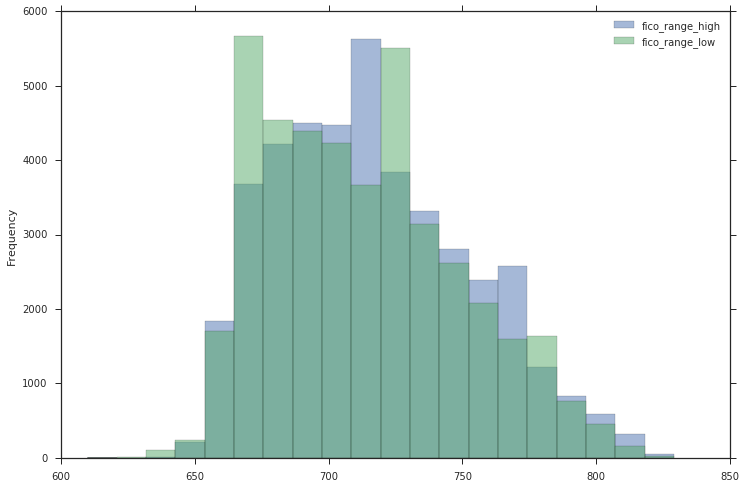

In [260]:
fico_columns = ['fico_range_high','fico_range_low']

print(loans_2007.shape[0])
loans_2007.dropna(subset=fico_columns,inplace=True)
print(loans_2007.shape[0])

loans_2007[fico_columns].plot.hist(alpha=0.5,bins=20);

#### FICO scores are a credit score, or a number used by banks and credit cards to represent how credit-worthy a person is. 
<p>When a borrower applies for a loan, Lending Club gets the borrowers credit score from FICO - they are given a lower and upper limit of the range that the borrowers score belongs to, and they store those values as fico_range_low, fico_range_high. After that, any updates to the borrowers score are recorded as last_fico_range_low, and last_fico_range_high.
Rference-http://cs229.stanford.edu/proj2014/Kevin%20Tsai,Sivagami%20Ramiah,Sudhanshu%20Singh,Peer%20Lending%20Risk%20Predictor.pdf
</p>


# Average of high and low fico score range|

In [261]:
loans_2007['fico_average'] = (loans_2007['fico_range_high'] + loans_2007['fico_range_low']) / 2

In [262]:
cols = ['fico_range_low','fico_range_high','fico_average']
loans_2007[cols].head()

,fico_range_low,fico_range_high,fico_average
0,735.0,739.0,737.0
1,740.0,744.0,742.0
2,735.0,739.0,737.0
3,690.0,694.0,692.0
4,695.0,699.0,697.0



#### droping fico_range_low, fico_range_high, last_fico_range_low, and last_fico_range_high columns.

In [263]:
drop_cols = ['fico_range_low','fico_range_high','last_fico_range_low',
             'last_fico_range_high']
loans_2007 = loans_2007.drop(drop_cols, axis=1)
loans_2007.shape

(42535, 33)

# Important to determine who will pay loan and who will default

## Meaning for each loan status-https://help.lendingclub.com/hc/en-us/articles/215488038

In [264]:
analysis[analysis.name == 'loan_status']


,name,dtypes,first value,description
16,loan_status,object,Fully Paid,Current status of the loan


In [265]:
loans_2007["loan_status"].value_counts()


Fully Paid                                             34115
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Late (31-120 days)                                         1
Name: loan_status, dtype: int64

In [266]:
meaning = [
    "Loan has been fully repaid, either at the expiration of the 3- or 5-year year term or as a result of a prepayment.",
    "Loan for which there is no longer a reasonable expectation of further payments.Charge Off occurs no later than 30 days after the Default status is reached.",
    "While the loan was fully paid  off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",
    "While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",
    "Loan has not been current for 31 to 120 days.(late on the current payment)."]

# meaning = [
#     "Loan has been fully paid off.",
#     "Loan for which there is no longer a reasonable expectation of further payments.",
#     "While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",
#     "While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",
#     "Loan is up to date on current payments.",
#     "The loan is past due but still in the grace period of 15 days.",
#     "Loan hasn't been paid in 31 to 120 days (late on the current payment).",
#     "Loan hasn't been paid in 16 to 30 days (late on the current payment).",
#     "Loan is defaulted on and no payment has been made for more than 121 days."]

status, count = loans_2007["loan_status"].value_counts().index, loans_2007["loan_status"].value_counts().values



In [267]:
loan_statuses_explanation = pd.DataFrame({'Loan Status': status,'Count': count,'Meaning': meaning})[['Loan Status','Count','Meaning']]
loan_statuses_explanation

,Loan Status,Count,Meaning
0,Fully Paid,34115,"Loan has been fully repaid, either at the expiration of the 3- or 5-year year term or as a result of a prepayment."
1,Charged Off,5670,Loan for which there is no longer a reasonable expectation of further payments.Charge Off occurs no later than 30 days after the Default status is reached.
2,Does not meet the credit policy. Status:Fully Paid,1988,"While the loan was fully paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace."
3,Does not meet the credit policy. Status:Charged Off,761,"While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace."
4,Late (31-120 days),1,Loan has not been current for 31 to 120 days.(late on the current payment).


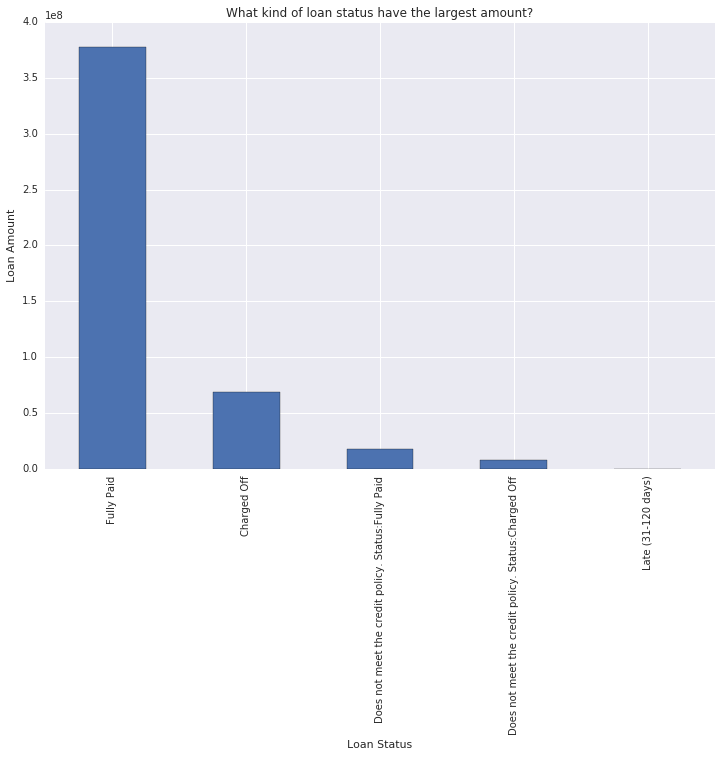

In [17]:
loans_2007.groupby('loan_status')['loan_amnt'].sum().sort_values(ascending=0).plot(kind='bar')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.title('What kind of loan status have the largest amount?')

# machine learning model goal 
<p>Predict Defaulting loans. 
From the above table, only the Fully Paid and Charged Off values describe the final outcome of a loan. 
The other values describe loans that are still on going, and even though some loans are late on payments, we can’t jump the gun and classify them as Charged Off.

Also, while the Default status resembles the Charged Off status, in Lending Club’s eyes, loans that are charged off have essentially no chance of being repaid while default ones have a small chance. Therefore, we should use only samples where the loan_status column is 'Fully Paid' or 'Charged Off'.

We’re not interested in any statuses that indicate that the loan is ongoing or in progress, because predicting that something is in progress doesn’t tell us anything.

Since we’re interested in being able to predict which of these 2 values a loan will fall under, we can treat the problem as binary classification.

Let’s remove all the loans that don’t contain either <b>'Fully Paid' or 'Charged Off' </b> as the loan’s status and then transform the 'Fully Paid' values to 1 for the positive case and the 'Charged Off' values to 0 for the negative case.
</p>


In [268]:
loans_2007 = loans_2007[(loans_2007["loan_status"] == "Fully Paid") |
                            (loans_2007["loan_status"] == "Charged Off")]

mapping_dictionary = {"loan_status":{ "Fully Paid": 1, "Charged Off": 0}}
loans_2007 = loans_2007.replace(mapping_dictionary)

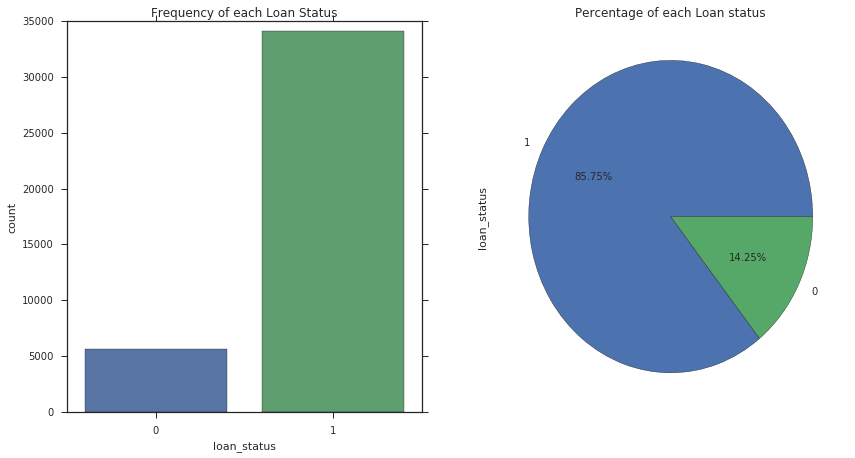

In [269]:
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='loan_status',data=loans_2007,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
loans_2007.loan_status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()

### These plots indicate that a significant number of borrowers in our dataset paid off their loan - 85.75% of loan borrowers paid off amount borrowed, while 14.25% unfortunately defaulted. So now our interest is in these defaulters

#### any columns that contain only one unique value and remove them. These columns won’t be useful for the model since they don’t add any information to each loan application

In [270]:
loans_2007 = loans_2007.loc[:,loans_2007.apply(pd.Series.nunique) != 1]

In [271]:
#not used to drop
for col in loans_2007.columns:
    if (len(loans_2007[col].unique()) < 4):
        print(loans_2007[col].value_counts())
        print()

 36 months    29096
 60 months    10689
Name: term, dtype: int64

Not Verified       16926
Verified           12843
Source Verified    10016
Name: verification_status, dtype: int64

1    34115
0     5670
Name: loan_status, dtype: int64



# Loan Amount Distribution

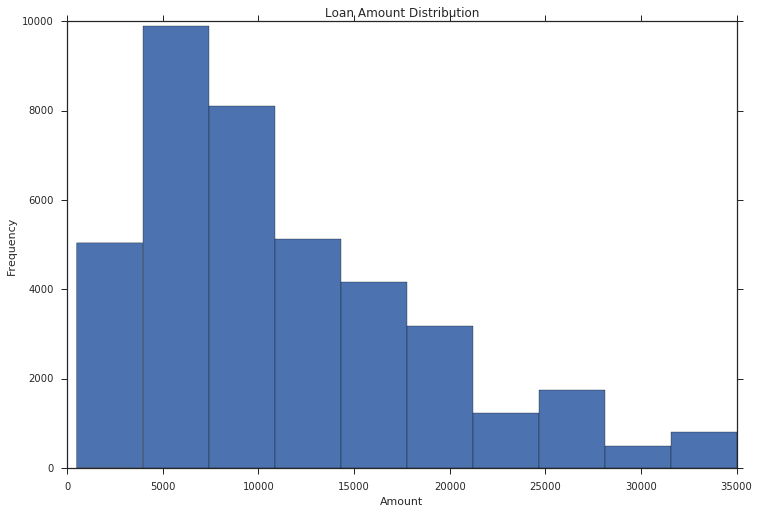

In [286]:
loans_2007['loan_amnt'].plot.hist()
plt.title('Loan Amount Distribution')
plt.ylabel('Frequency')
plt.xlabel('Amount')

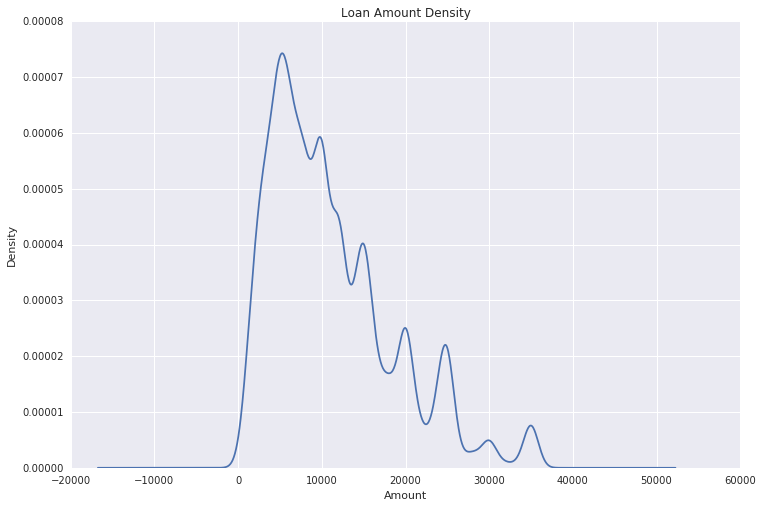

In [14]:
loans_2007['loan_amnt'].plot.density()
plt.xlabel('Amount')
plt.title('Loan Amount Density')



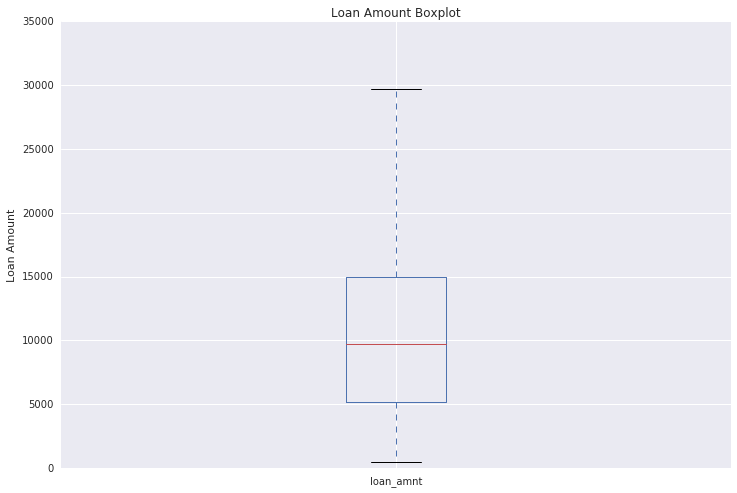

In [15]:
loans_2007['loan_amnt'].plot.box()
plt.title('Loan Amount Boxplot')
plt.ylabel('Loan Amount')
plt.xlabel('')

# Fancy world cloud for values of title

(-0.5, 399.5, 199.5, -0.5)

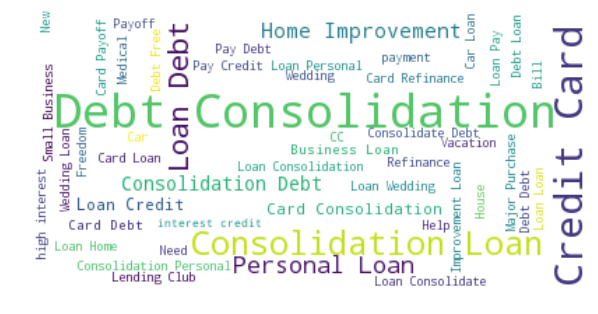

In [23]:
from os import path
from wordcloud import WordCloud
plt.figure(figsize=(10,7))
text = loans_2007['title'].to_json()
wc = WordCloud(ranks_only=True,prefer_horizontal = 0.6,background_color = 'white',
              max_words = 50).generate(text)
plt.imshow(wc)
plt.axis("off")



# Loan Grade distribution

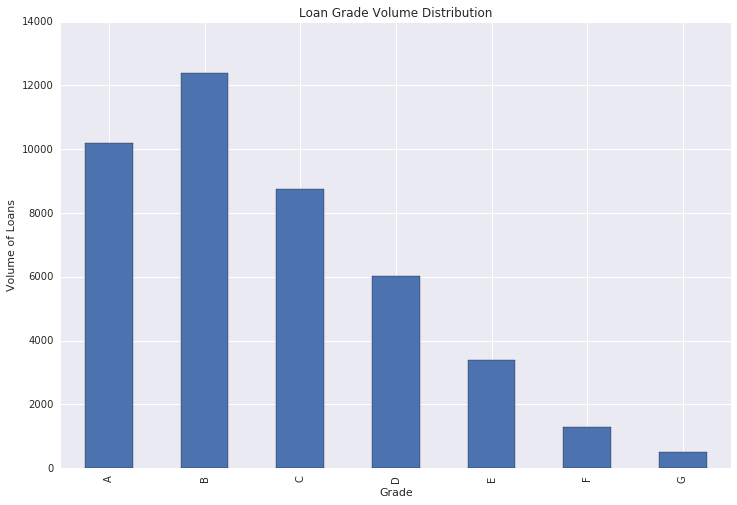

In [24]:
loans_2007['grade'].value_counts().sort_index().plot(kind='bar')
plt.title('Loan Grade Volume Distribution')
plt.xlabel('Grade')
plt.ylabel('Volume of Loans')

# Loan Grade distribution with loan amount

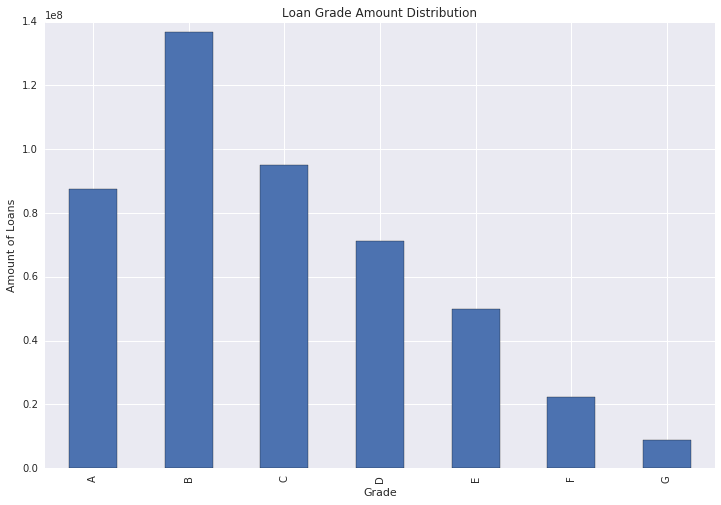

In [25]:
loans_2007.groupby('grade')['loan_amnt'].sum().sort_index().plot(kind='bar')
plt.title('Loan Grade Amount Distribution')
plt.xlabel('Grade')
plt.ylabel('Amount of Loans')

# Saving summarized file 

In [272]:
loans_2007.to_csv("filtered_loans_2007.csv",index=False)

In [273]:
from io import BytesIO  
import requests  
import json  
import pandas as pd

def put_file(credentials, local_file_name):  
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage V3."""
    f = open(local_file_name,'r')
    my_data = f.read()
    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': credentials['username'],'domain': {'id': credentials['domain_id']},
            'password': credentials['password']}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', credentials['container'], '/', local_file_name])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.put(url=url2, headers=headers2, data = my_data )
    print (resp2)

In [274]:
put_file(credentials_2,'filtered_loans_2007.csv')

<Response [201]>


#### Learning from data for feature  selection

In [275]:

filtered_loans = pd.read_csv('filtered_loans_2007.csv')
print(filtered_loans.shape)
filtered_loans.head()


(39785, 24)


,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies,fico_average
0,5000.0,36 months,162.87,B,10+ years,RENT,24000.0,Verified,1,credit_card,Computer,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,Mar-2017,0.0,737.0
1,2500.0,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,0,car,bike,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,Oct-2016,0.0,742.0
2,2400.0,36 months,84.33,C,10+ years,RENT,12252.0,Not Verified,1,small_business,real estate business,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,Mar-2017,0.0,737.0
3,10000.0,36 months,339.31,C,10+ years,RENT,49200.0,Source Verified,1,other,personel,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21%,37.0,Apr-2016,0.0,692.0
4,3000.0,60 months,67.79,B,1 year,RENT,80000.0,Source Verified,1,other,Personal,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9%,38.0,Jan-2017,0.0,697.0


# Misssing Values Analysis
<p>Notice while most of the columns have 0 missing values, title has 10 missing values, revol_util has 48, and pub_rec_bankruptcies contains 697 rows with missing values. Let’s remove columns entirely where more than 1% (392) of the rows for that column contain a null value. In addition, we’ll remove the remaining rows containing null values, which means we’ll lose a bit of data, but in return keep some extra features to use for prediction.

This means that we’ll keep the title and revol_util columns, just removing rows containing missing values, but drop the pub_rec_bankruptcies column entirely since more than 1% of the rows have a missing value for this column.<p>

In [276]:
null_counts = filtered_loans.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
loan_amnt                 0
term                      0
installment               0
grade                     0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
purpose                   0
title                    10
addr_state                0
dti                       0
delinq_2yrs               0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util               50
total_acc                 0
last_credit_pull_d        2
pub_rec_bankruptcies    697
fico_average              0
dtype: int64


In [277]:
filtered_loans = filtered_loans.drop("pub_rec_bankruptcies",axis=1)
filtered_loans = filtered_loans.dropna()


# Getting Categorical Columns
<p>11 columns are object type</p>

In [278]:
print("Data types and their frequency\n{}".format(filtered_loans.dtypes.value_counts()))

Data types and their frequency
object     11
float64    11
int64       1
dtype: int64


## Investigating these colums you check how to format them

In [279]:
object_columns_df = filtered_loans.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])


term                     36 months
grade                            B
emp_length               10+ years
home_ownership                RENT
verification_status       Verified
purpose                credit_card
title                     Computer
addr_state                      AZ
earliest_cr_line          Jan-1985
revol_util                   83.7%
last_credit_pull_d        Mar-2017
Name: 0, dtype: object


# Revolving line Utilization
<p>revol_util is a revolving line utilization rate or the amount of credit the borrower is using relative to all available credit
http://blog.credit.com/2013/04/what-is-revolving-utilization-65530/</p>

In [280]:
filtered_loans['revol_util'] = filtered_loans['revol_util'].str.rstrip('%').astype('float')

# Investigation other columns
<p>home_ownership - home ownership status, can only be 1 of 4 categorical values according to the data dictionary.</p>
<p>verification_status - indicates if income was verified by Lending Club.</p>
<p>emp_length - number of years the borrower was employed upon time of application.</p>
<p>term - number of payments on the loan, either 36 or 60.</p>
<p>addr_state - borrower’s state of residence.</p>
<p>grade - LC assigned loan grade based on credit score.</p>
<p>purpose - a category provided by the borrower for the loan request.</p>
<p>title - loan title provided the borrower.</p>


In [281]:

cols = ['home_ownership', 'grade','verification_status', 'emp_length', 'term', 'addr_state']
for name in cols:
    print(name,':')
    print(object_columns_df[name].value_counts(),'\n')

home_ownership :
RENT        18881
MORTGAGE    17687
OWN          3056
OTHER          96
NONE            3
Name: home_ownership, dtype: int64 

grade :
B    12030
A    10083
C     8096
D     5306
E     2845
F     1047
G      316
Name: grade, dtype: int64 

verification_status :
Not Verified       16890
Verified           12832
Source Verified    10001
Name: verification_status, dtype: int64 

emp_length :
10+ years    8897
< 1 year     4576
2 years      4389
3 years      4094
4 years      3435
5 years      3279
1 year       3240
6 years      2227
7 years      1771
8 years      1482
9 years      1259
n/a          1074
Name: emp_length, dtype: int64 

term :
 36 months    29041
 60 months    10682
Name: term, dtype: int64 

addr_state :
CA    7095
NY    3815
FL    2869
TX    2729
NJ    1850
IL    1524
PA    1515
VA    1407
GA    1399
MA    1343
OH    1221
MD    1053
AZ     878
WA     841
CO     791
NC     788
CT     754
MI     722
MO     685
MN     613
NV     497
SC     472
WI     459
AL

In [283]:
for name in ['purpose','title']:
    print("Unique Values in column: {}\n".format(name))
    print(filtered_loans[name].value_counts(),'\n')

Unique Values in column: purpose

debt_consolidation    18660
credit_card            5134
other                  3985
home_improvement       2980
major_purchase         2182
small_business         1827
car                    1549
wedding                 947
medical                 693
moving                  581
house                   382
vacation                380
educational             320
renewable_energy        103
Name: purpose, dtype: int64 

Unique Values in column: title

Debt Consolidation                          2188
Debt Consolidation Loan                     1732
Personal Loan                                661
Consolidation                                516
debt consolidation                           508
Credit Card Consolidation                    357
Home Improvement                             357
Debt consolidation                           334
Small Business Loan                          329
Credit Card Loan                             319
Personal              

# Dropping columns
<p>Purpose and title are same- Purpose is more useful and discrete</p>
<p>earliest_cr_line and last_credit_pull_d date values-complex to analysze in featue engineering</p>

In [284]:
drop_cols = ['last_credit_pull_d','addr_state','title','earliest_cr_line']
filtered_loans = filtered_loans.drop(drop_cols,axis=1)

# Categorical Values type
Ordinal Values-sort or order them either in increasing or decreasing order eg.grade
Nominal Values-regular categorical values. You can’t order nominal values. eg. emp_length
<p><b>Ordinal Values</b></p>
<p>grade</p>
<p>emp_length</p>

<p><b>Nominal Values <b></p>
<p>home_ownership</p>
<p>verification_status</p>
<p>purpose</p>
<p>term</p>

In [285]:
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0
 
    },
    "grade":{
        "A": 1,
        "B": 2,
        "C": 3,
        "D": 4,
        "E": 5,
        "F": 6,
        "G": 7
    }
}

filtered_loans = filtered_loans.replace(mapping_dict)
filtered_loans[['emp_length','grade']].head()

,emp_length,grade
0,10,2
1,0,3
2,10,3
3,10,3
4,1,2


In [106]:
nominal_columns = ["home_ownership", "verification_status", "purpose", "term"]
dummy_df = pd.get_dummies(filtered_loans[nominal_columns])
filtered_loans = pd.concat([filtered_loans, dummy_df], axis=1)
filtered_loans = filtered_loans.drop(nominal_columns, axis=1)


In [107]:
filtered_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39723 entries, 0 to 39784
Data columns (total 39 columns):
loan_amnt                              39723 non-null float64
installment                            39723 non-null float64
grade                                  39723 non-null int64
emp_length                             39723 non-null int64
annual_inc                             39723 non-null float64
loan_status                            39723 non-null int64
dti                                    39723 non-null float64
delinq_2yrs                            39723 non-null float64
inq_last_6mths                         39723 non-null float64
open_acc                               39723 non-null float64
pub_rec                                39723 non-null float64
revol_bal                              39723 non-null float64
revol_util                             39723 non-null float64
total_acc                              39723 non-null float64
fico_average                 

In [109]:
filtered_loans.to_csv("cleaned_loans_2007.csv",index=False)

In [110]:
put_file(credentials_2,'cleaned_loans_2007.csv')

<Response [201]>


In [22]:
!pip install wordcloud

    100% |████████████████████████████████| 174kB 4.2MB/s 
  Running setup.py bdist_wheel for wordcloud ... - \ | done
  Stored in directory: /gpfs/fs01/user/sf25-56c748a700a818-16c413432379/.cache/pip/wheels/d9/4c/ac/e63c45f2ce09860e9459a410953039c30296e89d9f7234675f
Successfully built wordcloud


# Rejected loans Analysis

In [6]:

df_data_4 = pd.read_csv(get_object_storage_file_with_credentials_d81e053948364da9ae629665be5a872c('LendingClubDataSet', 'RejectStatsA.csv'),skiprows=1)
df_data_4.head()


,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0


In [7]:
df_data_4.columns = [x.strip().replace(' ', '_') for x in df_data_4.columns]
df_data_4.columns

Index(['Amount_Requested', 'Application_Date', 'Loan_Title', 'Risk_Score',
       'Debt-To-Income_Ratio', 'Zip_Code', 'State', 'Employment_Length',
       'Policy_Code'],
      dtype='object')

In [9]:
mapping_dict = {
    "Employment_Length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0
 
    }
}
rejectedloans=df_data_4
rejectedloans = rejectedloans.replace(mapping_dict)
rejectedloans[['Employment_Length']].head()

,Employment_Length
0,4
1,0
2,1
3,0
4,0


In [10]:
rejectedloans.head()

,Amount_Requested,Application_Date,Loan_Title,Risk_Score,Debt-To-Income_Ratio,Zip_Code,State,Employment_Length,Policy_Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4,0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,0,0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1,0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,0,0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,0,0


# As rejected loans so ploicy code zero. Not needed can be dropped

In [315]:
rejectedloans.policy_code.value_counts()

0    755491
Name: policy_code, dtype: int64

# Zip code has only 3 digits. And we have state so can be removed

In [11]:
drop_list = ['Policy_Code','Zip_Code']
rejectedloans = rejectedloans.drop(drop_list,axis=1)
rejectedloans.head()

,Amount_Requested,Application_Date,Loan_Title,Risk_Score,Debt-To-Income_Ratio,State,Employment_Length
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,NM,4
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,MA,0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,MD,1
3,6000.0,2007-05-27,waksman,698.0,38.64%,MA,0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,MD,0


In [23]:


half_count = len(rejectedloans) / 2
rejectedloans = rejectedloans.dropna(thresh=half_count,axis=1) # Drop any column with more than 50% missing values


(-0.5, 399.5, 199.5, -0.5)

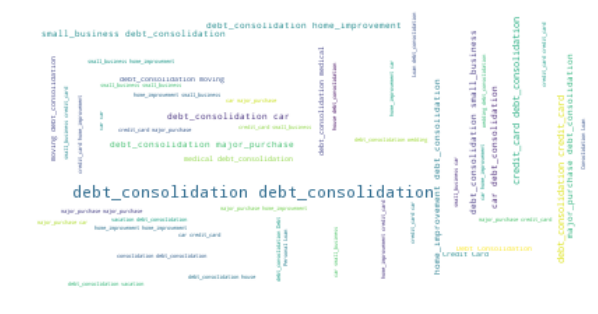

In [24]:
from os import path
from wordcloud import WordCloud
plt.figure(figsize=(10,7))
text = rejectedloans['Loan_Title'].to_json()
wc = WordCloud(ranks_only=True,prefer_horizontal = 0.6,background_color = 'white',
              max_words = 50).generate(text)
plt.imshow(wc)
plt.axis("off")


731562
731562


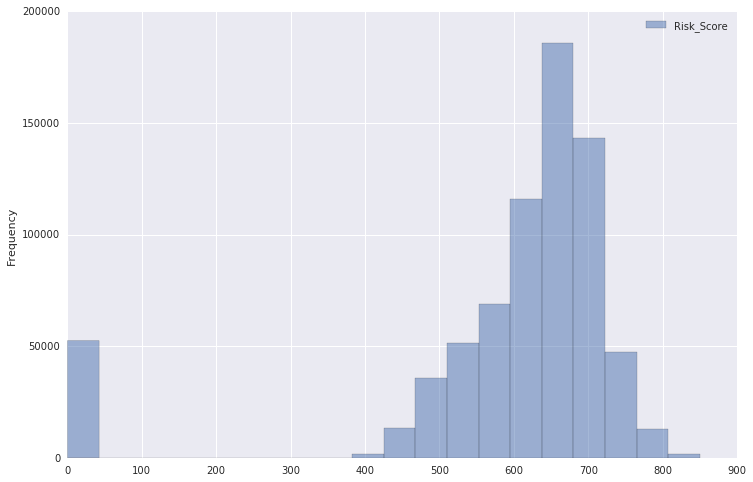

In [25]:
fico_columns = ['Risk_Score']

print(rejectedloans.shape[0])
rejectedloans.dropna(subset=fico_columns,inplace=True)
print(rejectedloans.shape[0])

rejectedloans[fico_columns].plot.hist(alpha=0.5,bins=20);

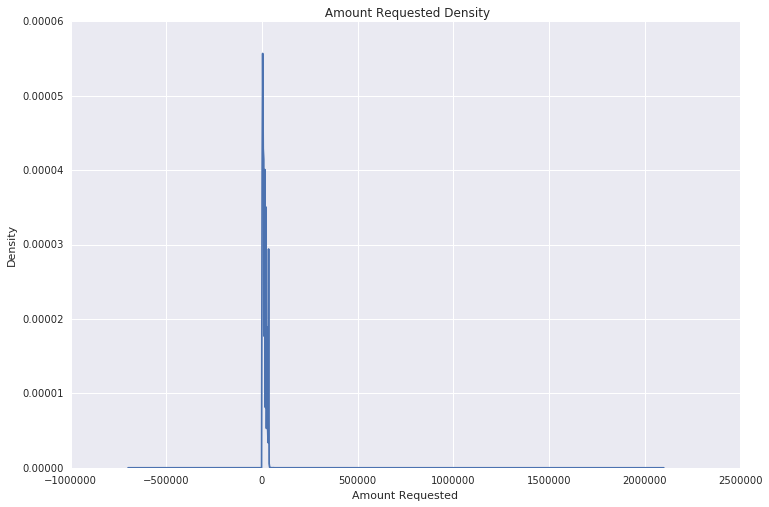

In [26]:
rejectedloans['Amount_Requested'].plot.density()
plt.xlabel('Amount Requested')
plt.title(' Amount Requested Density')

In [27]:
rejectedloans['Amount_Requested'].unique()

array([  1000.,  11000.,   6000., ...,  32350.,  34650.,  32950.])

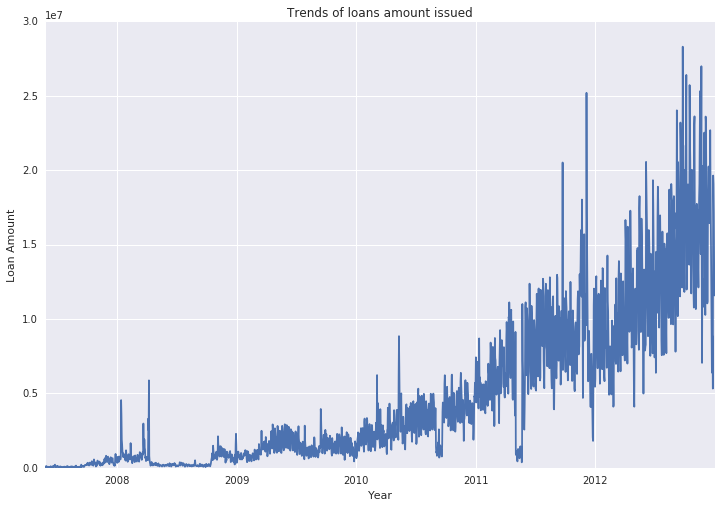

In [28]:
rejectedloans['Application_Date'] = pd.to_datetime(rejectedloans.Application_Date)
rejectedloans.groupby('Application_Date')['Amount_Requested'].sum().plot()
plt.title('Trends of loans amount issued')
plt.xlabel('Year')
plt.ylabel('Loan Amount')

In [29]:
null_counts = rejectedloans.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
Amount_Requested         0
Application_Date         0
Loan_Title               5
Risk_Score               0
Debt-To-Income_Ratio     0
State                   19
Employment_Length        0
dtype: int64
